## Imports 

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
%matplotlib inline 
from caserec.recommenders.item_recommendation.most_popular import MostPopular

## Parameters

In [3]:
dataset_tag = 'ML100k'

In [4]:
dataset_output_folder = os.path.join('.', 'outputs', dataset_tag)
dataset_output_folder

'./outputs/ML100k'

## Loading Dataset

In [5]:
data_path = './../../Datasets/MovieLens/100k_raw/u.data'
def get_dataset(conn = None, data_path = None, columns = ['user', 'item', 'feedback_value', 'timestamp'], sep = '\t'):
    if conn is None:
        df_dataset = pd.read_csv(data_path, sep=sep, header=None, names=columns)
    
    return df_dataset

df_ratings = get_dataset(data_path=data_path)
df_ratings.head()

,user,item,feedback_value,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [6]:
df_train, df_test = train_test_split(df_ratings, test_size=0.3)
print ("Train size: {} \nTest size: {}".format(df_train.shape[0], df_test.shape[0]))

Train size: 70000 
Test size: 30000


## Training Model

In [18]:
model = MostPopular(train_file=df_train, test_file=df_test, rank_length=10)


In [19]:
%%time
model.compute(verbose=True)

[Case Recommender: Item Recommendation > Most Popular]

train data:: 943 users and 1639 items (70000 interactions) | sparsity:: 95.47%
test data:: 943 users and 1494 items (30000 interactions) | sparsity:: 97.87%

prediction_time:: 95.169173 sec


Eval:: PREC@1: 0.370095 PREC@3: 0.296571 PREC@5: 0.274443 PREC@10: 0.24772 RECALL@1: 0.014028 RECALL@3: 0.034055 RECALL@5: 0.052386 RECALL@10: 0.097925 MAP@1: 0.370095 MAP@3: 0.444503 MAP@5: 0.448392 MAP@10: 0.41942 NDCG@1: 0.370095 NDCG@3: 0.516895 NDCG@5: 0.536167 NDCG@10: 0.539136 MRR@1: 0.370095 MRR@3: 0.454401 MRR@5: 0.480753 MRR@10: 0.50103 
CPU times: user 1min 48s, sys: 112 ms, total: 1min 48s
Wall time: 1min 48s


In [26]:
arr_k = np.arange(1, 21, 1)
model.evaluate(metrics=['PREC', 'RECALL', 'MAP', 'NDCG', 'MRR'], n_ranks = arr_k)

Eval:: PREC@1: 0.370095 PREC@2: 0.325557 PREC@3: 0.296571 PREC@4: 0.287911 PREC@5: 0.274443 PREC@6: 0.266879 PREC@7: 0.26087 PREC@8: 0.254772 PREC@9: 0.250265 PREC@10: 0.24772 PREC@11: 0.2252 PREC@12: 0.206433 PREC@13: 0.190554 PREC@14: 0.176943 PREC@15: 0.165147 PREC@16: 0.154825 PREC@17: 0.145718 PREC@18: 0.137622 PREC@19: 0.130379 PREC@20: 0.12386 RECALL@1: 0.014028 RECALL@2: 0.025709 RECALL@3: 0.034055 RECALL@4: 0.044328 RECALL@5: 0.052386 RECALL@6: 0.062368 RECALL@7: 0.07091 RECALL@8: 0.078744 RECALL@9: 0.08758 RECALL@10: 0.097925 RECALL@11: 0.097925 RECALL@12: 0.097925 RECALL@13: 0.097925 RECALL@14: 0.097925 RECALL@15: 0.097925 RECALL@16: 0.097925 RECALL@17: 0.097925 RECALL@18: 0.097925 RECALL@19: 0.097925 RECALL@20: 0.097925 MAP@1: 0.370095 MAP@2: 0.435313 MAP@3: 0.444503 MAP@4: 0.452516 MAP@5: 0.448392 MAP@6: 0.447434 MAP@7: 0.440857 MAP@8: 0.433607 MAP@9: 0.426471 MAP@10: 0.41942 MAP@11: 0.41942 MAP@12: 0.41942 MAP@13: 0.41942 MAP@14: 0.41942 MAP@15: 0.41942 MAP@16: 0.41942 MA

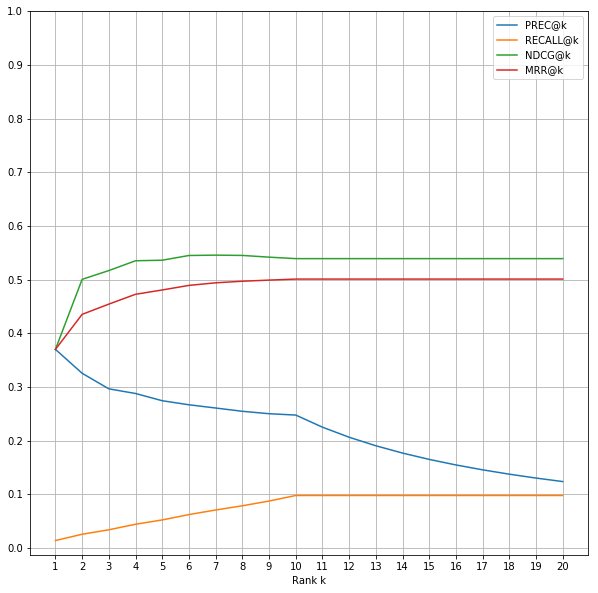

In [63]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10))

ax.plot(arr_k, [model.evaluation_results['PREC@' + str(x)] for x in arr_k], label='PREC@k')
ax.plot(arr_k, [model.evaluation_results['RECALL@' + str(x)] for x in arr_k], label='RECALL@k')
ax.plot(arr_k, [model.evaluation_results['NDCG@' + str(x)] for x in arr_k], label='NDCG@k')
ax.plot(arr_k, [model.evaluation_results['MRR@' + str(x)] for x in arr_k], label='MRR@k')
ax.set_xticks(arr_k)
ax.set_yticks([x/100.0 for x in np.arange(0, 101, 10)])
ax.set_xlabel('Rank k')
ax.legend()
ax.grid(True)

In [21]:
model.train_set.keys()
# model.train_set['mean_value']
model.ranking

[(1, 286, 1202),
 (1, 288, 1168),
 (1, 172, 1101),
 (1, 300, 1072),
 (1, 294, 1055),
 (1, 313, 1030),
 (1, 173, 1012),
 (1, 222, 945),
 (1, 302, 919),
 (1, 318, 891),
 (2, 181, 1456),
 (2, 258, 1340),
 (2, 127, 1237),
 (2, 174, 1211),
 (2, 286, 1202),
 (2, 98, 1194),
 (2, 1, 1190),
 (2, 56, 1127),
 (2, 172, 1101),
 (2, 121, 1050),
 (3, 50, 1799),
 (3, 100, 1461),
 (3, 181, 1456),
 (3, 127, 1237),
 (3, 174, 1211),
 (3, 286, 1202),
 (3, 98, 1194),
 (3, 1, 1190),
 (3, 288, 1168),
 (3, 56, 1127),
 (4, 100, 1461),
 (4, 181, 1456),
 (4, 127, 1237),
 (4, 174, 1211),
 (4, 286, 1202),
 (4, 98, 1194),
 (4, 1, 1190),
 (4, 288, 1168),
 (4, 56, 1127),
 (4, 172, 1101),
 (5, 50, 1799),
 (5, 258, 1340),
 (5, 127, 1237),
 (5, 286, 1202),
 (5, 1, 1190),
 (5, 288, 1168),
 (5, 56, 1127),
 (5, 300, 1072),
 (5, 294, 1055),
 (5, 313, 1030),
 (6, 100, 1461),
 (6, 181, 1456),
 (6, 286, 1202),
 (6, 1, 1190),
 (6, 288, 1168),
 (6, 56, 1127),
 (6, 172, 1101),
 (6, 300, 1072),
 (6, 121, 1050),
 (6, 313, 1030),
 (7